Hola José!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Descripción

La compañía de seguros Sure Tomorrow quiere resolver varias tareas con la ayuda de machine learning y te pide que evalúes esa posibilidad.
- Tarea 1: encontrar clientes que sean similares a un cliente determinado. Esto ayudará a los agentes de la compañía con el marketing.
- Tarea 2: predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro. ¿Puede un modelo de predictivo funcionar mejor que un modelo dummy?
- Tarea 3: predecir el número de prestaciones de seguro que un nuevo cliente pueda recibir utilizando un modelo de regresión lineal.
- Tarea 4: proteger los datos personales de los clientes sin afectar al modelo del ejercicio anterior. Es necesario desarrollar un algoritmo de transformación de datos que dificulte la recuperación de la información personal si los datos caen en manos equivocadas. Esto se denomina enmascaramiento u ofuscación de datos. Pero los datos deben protegerse de tal manera que no se vea afectada la calidad de los modelos de machine learning. No es necesario elegir el mejor modelo, basta con demostrar que el algoritmo funciona correctamente.


# Preprocesamiento y exploración de datos

## Inicialización

In [4]:
#pip install scikit-learn --upgrade

In [5]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

from scipy.spatial import distance

import matplotlib.pyplot as plt

import math

## Carga de datos

Carga los datos y haz una revisión básica para comprobar que no hay problemas obvios.

In [6]:
df = pd.read_csv('insurance_us.csv')

Renombramos las columnas para que el código se vea más coherente con su estilo.

In [7]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la carga de los datos y el cambio de nombre en las columnas!
</div>

In [8]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
2619,0,32.0,39300.0,1,0
1094,1,30.0,51800.0,0,0
212,1,29.0,49400.0,0,0
154,0,36.0,43100.0,0,0
2197,1,39.0,42300.0,0,0
1312,1,37.0,27000.0,1,0
1684,1,45.0,58700.0,1,1
4758,0,30.0,58200.0,2,0
3317,0,37.0,45000.0,4,0
3522,1,24.0,32400.0,2,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [10]:
# puede que queramos cambiar el tipo de edad (de float a int) aunque esto no es crucial

# escribe tu conversión aquí si lo deseas:
df['age'] = df['age'].astype('int32')

In [11]:
# comprueba que la conversión se haya realizado con éxito
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int32  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int32(1), int64(3)
memory usage: 175.9 KB


In [12]:
# ahora echa un vistazo a las estadísticas descriptivas de los datos.# ¿Se ve todo bien?

In [13]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [14]:
#Todo ok.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen uso de los métodos para esta exploración inicial
</div>

## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

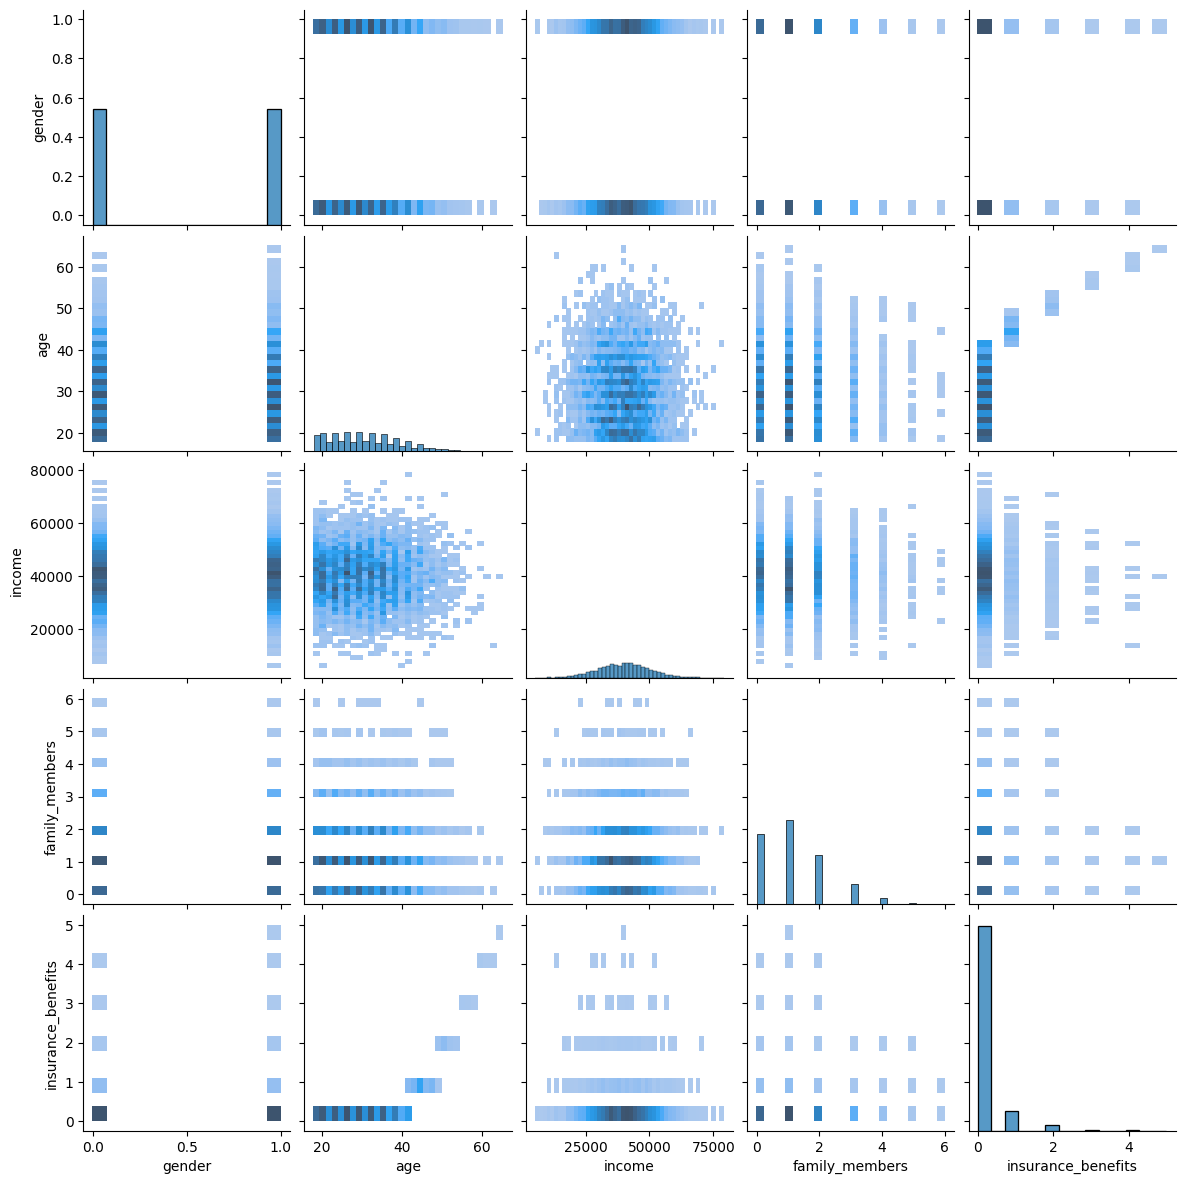

In [15]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

De acuerdo, es un poco complicado detectar grupos obvios (clústeres) ya que es difícil combinar diversas variables simultáneamente (para analizar distribuciones multivariadas). Ahí es donde LA y ML pueden ser bastante útiles.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Usaste la gráfica adecuada para revisar los datos
</div>

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.
Es posible que quieras revisar las siguientes lecciones (capítulo -> lección)- Distancia entre vectores -> Distancia euclidiana
- Distancia entre vectores -> Distancia Manhattan

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Escribe una función que devuelva los k vecinos más cercanos para un $n^{th}$ objeto basándose en una métrica de distancia especificada. A la hora de realizar esta tarea no debe tenerse en cuenta el número de prestaciones de seguro recibidas.
Puedes utilizar una implementación ya existente del algoritmo kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) o tu propia implementación.
Pruébalo para cuatro combinaciones de dos casos- Escalado
  - los datos no están escalados
  - los datos se escalan con el escalador [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html)
- Métricas de distancia
  - Euclidiana
  - Manhattan

Responde a estas preguntas:- ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?- ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [16]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [17]:
def get_knn(df, n, k, metric=''):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    
    :param n: número de objetos para los que se buscan los vecinos más cercanos. Default = 5    
    :param k: número de vecinos más cercanos a devolver. Default = 2
    :param métrica: nombre de la métrica de distancia    """
    
    nbrs = NearestNeighbors()
    nbrs.fit(df[feature_names].values) 
    
    if metric == 'eucl':
        
        nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=False)
        
        list_eucl = []
        for x in range(df.iloc[nbrs_indices[0]][feature_names].shape[0]):
            d_eucl = distance.euclidean(df.iloc[nbrs_indices[0]][feature_names].values[0],
                                        df.iloc[nbrs_indices[0]][feature_names].values[x])
            list_eucl.append(d_eucl)
            
            
        vector_eucl = np.array(list_eucl)
        df_res = pd.concat([
                df.iloc[nbrs_indices[0]],
                pd.DataFrame(vector_eucl.T, index=nbrs_indices[0], columns=['euclidian_distance'])
            ], axis = 1)
        
    elif metric == 'man':
        
        nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=False)
        
        list_man = []
        for x in range(df.iloc[nbrs_indices[0]][feature_names].shape[0]):
            d_man = distance.cityblock(df.iloc[nbrs_indices[0]][feature_names].values[0],
                                        df.iloc[nbrs_indices[0]][feature_names].values[x])
            list_man.append(d_man)
        
        vector_man = np.array(list_man)
        df_res = pd.concat([
                df.iloc[nbrs_indices[0]],
                pd.DataFrame(vector_man.T, index=nbrs_indices[0], columns=['manhattan_distance'])
            ], axis = 1)
        
    else:       
                
        nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
        
        df_res = pd.concat([
            df.iloc[nbrs_indices[0]], 
            pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
            ], axis=1)
    
    return df_res

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con la creación de la función!
</div>

Escalar datos.

In [18]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [19]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
3566,0.0,0.676923,0.565823,0.500000,1
1264,1.0,0.400000,0.429114,0.166667,0
2023,1.0,0.523077,0.643038,0.000000,0
4221,1.0,0.600000,0.663291,0.000000,0
3706,1.0,0.584615,0.477215,0.333333,0


Ahora, vamos a obtener registros similares para uno determinado, para cada combinación

In [20]:
get_knn(df,7,8,metric='')

,gender,age,income,family_members,insurance_benefits,distance
7,1,25,38600.0,4,0,0.000000
3911,0,23,38600.0,2,0,3.000000
4505,1,22,38600.0,3,0,3.162278
2637,1,22,38600.0,1,0,4.242641
1649,0,29,38600.0,3,0,4.242641
1357,0,29,38600.0,2,0,4.582576
3902,1,21,38600.0,1,0,5.000000
344,0,28,38600.0,0,0,5.099020


In [21]:
get_knn(df_scaled,7,8,metric='')

,gender,age,income,family_members,insurance_benefits,distance
7,1.0,0.384615,0.488608,0.666667,0,0.000000
4303,1.0,0.400000,0.467089,0.666667,0,0.026453
296,1.0,0.400000,0.513924,0.666667,0,0.029624
2797,1.0,0.384615,0.454430,0.666667,0,0.034177
3350,1.0,0.338462,0.491139,0.666667,0,0.046223
3272,1.0,0.415385,0.440506,0.666667,0,0.057101
1781,1.0,0.369231,0.550633,0.666667,0,0.063905
4326,1.0,0.446154,0.456962,0.666667,0,0.069198


In [22]:
get_knn(df,7,8,metric='eucl')

,gender,age,income,family_members,insurance_benefits,euclidian_distance
7,1,25,38600.0,4,0,0.000000
3911,0,23,38600.0,2,0,3.000000
4505,1,22,38600.0,3,0,3.162278
2637,1,22,38600.0,1,0,4.242641
1649,0,29,38600.0,3,0,4.242641
1357,0,29,38600.0,2,0,4.582576
3902,1,21,38600.0,1,0,5.000000
344,0,28,38600.0,0,0,5.099020


In [23]:
get_knn(df,7,8,metric='man')

,gender,age,income,family_members,insurance_benefits,manhattan_distance
7,1,25,38600.0,4,0,0.0
3911,0,23,38600.0,2,0,5.0
4505,1,22,38600.0,3,0,4.0
2637,1,22,38600.0,1,0,6.0
1649,0,29,38600.0,3,0,6.0
1357,0,29,38600.0,2,0,7.0
3902,1,21,38600.0,1,0,7.0
344,0,28,38600.0,0,0,8.0


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Sí, afecta, ya que al calcular KNN con los datos escalados y usando los mismos parámetros, las características y distancias cambiaron en comparación con los datos sin escalar.

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?** 

Los datos son similares, solo que en la distancia Manhattan las distnacias son más largas.


Las observaciones que hay es que en el índice 3 911, aplicando la distancia euclidiana, la distancia es menor que el índice 4 505 y en la distancia Manhattan es mayor.

Otra observación es que los índices 1 357 y 3 902 calculados con la distancis auclidiana se encuentran en diferentes distancias a diferencia de la Manhattan que están a la misma.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente observación! Efectivamente con un escalamiento los modelos pueden ser más precisos ya que estos en base a las cantidades realizan las predicciones por lo que en ciertos casos el tener valores muy distantes causará que le de más peso a una feature que al resto
</div>

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.

Con el valor de `insurance_benefits` superior a cero como objetivo, evalúa si el enfoque de clasificación kNN puede funcionar mejor que el modelo dummy.
Instrucciones:
- Construye un clasificador basado en KNN y mide su calidad con la métrica F1 para k=1...10 tanto para los datos originales como para los escalados. Sería interesante observar cómo k puede influir en la métrica de evaluación y si el escalado de los datos provoca alguna diferencia. Puedes utilizar una implementación ya existente del algoritmo de clasificación kNN de scikit-learn (consulta [el enlace](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) o tu propia implementación.- Construye un modelo dummy que, en este caso, es simplemente un modelo aleatorio. Debería devolver "1" con cierta probabilidad. Probemos el modelo con cuatro valores de probabilidad: 0, la probabilidad de pagar cualquier prestación del seguro, 0.5, 1.
La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [24]:
# сalcula el objetivo
df['insurance_benefits_received'] = df['insurance_benefits'].sum() / len(df)


In [25]:
df['insurance_benefits_received']

0       0.148
1       0.148
2       0.148
3       0.148
4       0.148
        ...  
4995    0.148
4996    0.148
4997    0.148
4998    0.148
4999    0.148
Name: insurance_benefits_received, Length: 5000, dtype: float64

In [26]:
df

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,1,41,49600.0,1,0,0.148
1,0,46,38000.0,1,1,0.148
2,0,29,21000.0,0,0,0.148
3,0,21,41700.0,2,0,0.148
4,1,28,26100.0,0,0,0.148
...,...,...,...,...,...,...
4995,0,28,35700.0,2,0,0.148
4996,0,34,52400.0,1,0,0.148
4997,0,20,33900.0,2,0,0.148
4998,1,22,32700.0,3,0,0.148


In [27]:
df['insurance_benefits_received']

0       0.148
1       0.148
2       0.148
3       0.148
4       0.148
        ...  
4995    0.148
4996    0.148
4997    0.148
4998    0.148
4999    0.148
Name: insurance_benefits_received, Length: 5000, dtype: float64

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Vas por buen camino! Pero como se menciona al inicio de la sección esto debe ser una clasificación binaria, es decir las clases a predecir deben ser 2, en este caso 0 y 1. Te recomiendo usar la librería numpy de la siguiente forma `np.where(df['insurance_benefits'] == 0, 0, 1)` donde algún valor en esa columna tenga valor 0 entonces será 0 y sino se guardará cómo 1.
</div>

0    4436
1     423
2     115
3      18
4       7
5       1
Name: insurance_benefits, dtype: int64


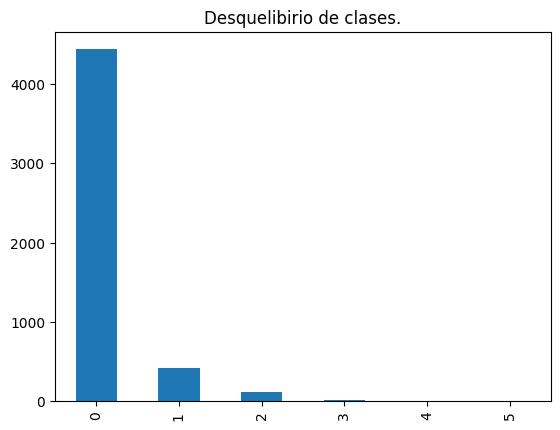

In [28]:
# comprueba el desequilibrio de clases con value_counts()

# <tu código aquí>
print(df['insurance_benefits'].value_counts())
df['insurance_benefits'].value_counts().plot(kind='bar',title='Desquelibirio de clases.')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo! Siempre es importante revisar que tan balanceado está el dataset ya que algunos algoritmos de ML son mejores que otros en cuanto a datasets desbalanceados
</div>

In [29]:
df_train, df_test = train_test_split(df,test_size=.3,random_state=13456)

df_scaled_train, df_scaled_test = train_test_split(df_scaled,test_size=.3,random_state=13456)

In [30]:
X_train = df_train[feature_names].values
y_train = df_train['insurance_benefits'].values

X_test = df_test[feature_names].values
y_test = df_test['insurance_benefits'].values

X_scaled_train = df_scaled_train[feature_names].values
y_scaled_train = df_scaled_train['insurance_benefits'].values

X_scaled_test = df_scaled_test[feature_names].values
y_scaled_test = df_test['insurance_benefits'].values

In [31]:
def eval_classifier(y_true, y_pred):

    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred,average='weighted')
    print(f'F1: {f1_score:.2f}')
    
# si tienes algún problema con la siguiente línea, reinicia el kernel y ejecuta el cuaderno de nuevo    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [32]:
for k in range(1,11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    eval_classifier(y_test,predictions)

F1: 0.91
Matriz de confusión
[[8.75333333e-01 1.06666667e-02 0.00000000e+00 0.00000000e+00
  6.66666667e-04]
 [3.46666667e-02 4.26666667e-02 6.00000000e-03 0.00000000e+00
  6.66666667e-04]
 [8.00000000e-03 1.00000000e-02 4.66666667e-03 0.00000000e+00
  0.00000000e+00]
 [2.00000000e-03 2.66666667e-03 6.66666667e-04 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 6.66666667e-04 6.66666667e-04 0.00000000e+00
  0.00000000e+00]]
F1: 0.87
Matriz de confusión
[[8.83333333e-01 3.33333333e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [6.40000000e-02 1.86666667e-02 1.33333333e-03 0.00000000e+00
  0.00000000e+00]
 [1.86666667e-02 3.33333333e-03 6.66666667e-04 0.00000000e+00
  0.00000000e+00]
 [4.00000000e-03 1.33333333e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [6.66666667e-04 6.66666667e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]
F1: 0.87
Matriz de confusión
[[8.81333333e-01 5.33333333e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [6.40000000e-02 1.86666667e-02

In [33]:
for k in range(1,11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_scaled_train,y_scaled_train)
    predictions = model.predict(X_scaled_test)
    eval_classifier(y_test,predictions)

F1: 0.97
Matriz de confusión
[[8.82666667e-01 4.00000000e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.00000000e-03 7.26666667e-02 5.33333333e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.33333333e-03 1.53333333e-02 2.00000000e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.66666667e-03 2.66666667e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.66666667e-04 0.00000000e+00
  0.00000000e+00 6.66666667e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
F1: 0.97
Matriz de confusión
[[8.86000000e-01 6.66666667e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.06666667e-02 7.13333333e-02 2.00000000e-03 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 8.66666667e-03 1.40000000e-02 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 6.66666667e-04 4.66666667e-03 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.66666667e-04 6.66

In [34]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [35]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    
    y_pred_rnd = rnd_model_predict(P,size=df['insurance_benefits_received'].shape)
    
    df['insurance_benefits_received'] = (df['insurance_benefits_received'] >= 0.5).astype(int)
    
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()   

La probabilidad: 0.00
F1: 1.00
Matriz de confusión
[[1.]]

La probabilidad: 0.15
F1: 0.92
Matriz de confusión
[[0.8542 0.1458]
 [0.     0.    ]]

La probabilidad: 0.50
F1: 0.67
Matriz de confusión
[[0.509 0.491]
 [0.    0.   ]]

La probabilidad: 1.00
F1: 0.00
Matriz de confusión
[[0. 1.]
 [0. 0.]]



<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

El proceso para revisar las métricas es el correcto pero debido a que generaste varias clases al inicio de esta sección pues te está dando valores que no son los esperados
</div>

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [36]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # añadir las unidades
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X2.T,X2)),X2.T),y)
        self.weight = self.weights[0]

    def predict(self, X):
        
        # añadir las unidades
        X2 = X
        y_pred = np.dot(X2,self.weights[1:]) + self.weight
        
        return y_pred

In [37]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [38]:
model = MyLinearRegression()
model.fit(X_train,y_train)

In [39]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


In [40]:
model = MyLinearRegression()

model.fit(X_scaled_train,y_scaled_train)
print(model.weights)

y_test_pred = model.predict(X_scaled_test)

eval_regressor(y_scaled_test, y_test_pred)

[-9.28789307e-01 -4.77365623e-04  2.29507869e+00  2.92098657e-03
 -9.37644036e-02]
RMSE: 0.35
R2: 0.66


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Hiciste una implementación del modelo correcta! Incluso se probó con los datos escalados
</div>

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [41]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [42]:
X = df_pn.to_numpy()

In [43]:
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

Generar una matriz aleatoria $P$.

In [44]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Comprobar que la matriz P sea invertible

In [45]:
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

¿Puedes adivinar la edad o los ingresos de los clientes después de la transformación?

No, no es posible porque paraceriran codificados.

In [46]:
X_prima = X.dot(P)

In [47]:
pd.DataFrame(X_prima,columns=personal_info_column_list)

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378
...,...,...,...,...
4995,4577.581382,16107.740932,13259.688205,33107.974380
4996,6717.000247,23634.217067,19456.138634,48589.438841
4997,4346.223425,15289.241265,12586.162644,31433.508886
4998,4194.093242,14751.991024,12144.029306,30323.887634


¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles

Sí se pueden recuperar.

$$
X = X' \times P^{-1}
$$

In [48]:
pd.DataFrame(X_prima.dot(np.linalg.inv(P)),columns=personal_info_column_list)

,gender,age,income,family_members
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.473636e-12,46.0,38000.0,1.000000e+00
2,-2.515869e-12,29.0,21000.0,9.524523e-13
3,-4.844982e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,-1.019907e-13
...,...,...,...,...
4995,-2.559766e-12,28.0,35700.0,2.000000e+00
4996,-5.486091e-12,34.0,52400.0,1.000000e+00
4997,-1.928379e-12,20.0,33900.0,2.000000e+00
4998,1.000000e+00,22.0,32700.0,3.000000e+00


Muestra los tres casos para algunos clientes- Datos originales
- El que está transformado- El que está invertido (recuperado)

In [49]:
#primer cliente.
print(X_prima[3478,:].dot(np.linalg.inv(P)))
print(df[personal_info_column_list].loc[3478])

[-1.8189894e-12  4.8000000e+01  2.5700000e+04  1.0000000e+00]
gender                0.0
age                  48.0
income            25700.0
family_members        1.0
Name: 3478, dtype: float64


In [50]:
#segundo cliente
print(X_prima[2845,:].dot(np.linalg.inv(P)))
print(df[personal_info_column_list].loc[2845])

[1.00e+00 2.40e+01 3.37e+04 1.00e+00]
gender                1.0
age                  24.0
income            33700.0
family_members        1.0
Name: 2845, dtype: float64


In [51]:
#tercer cliente
print(X_prima[4230,:].dot(np.linalg.inv(P)))
print(df[personal_info_column_list].loc[4230])

[-1.8189894e-12  3.2000000e+01  2.5600000e+04  1.0000000e+00]
gender                0.0
age                  32.0
income            25600.0
family_members        1.0
Name: 4230, dtype: float64


Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

Podría ser por la matriz P se genera con número que son muy pequeños. e.g. 
$$
1x10^{-12}
$$

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Excelente proceso de ofuscar los datos, hiciste uso de la librería numpy de la forma correcta para lograr el objetivo de este ejercicio
</div>

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

La relación de $w$ y $wp$. Es que son los mismos valores pero multiplicados por otra matriz e.g $P$

Los valores predichos con $w_P$ serían $\hat{y} = X_{val} w_P$

**Prueba analítica**

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM? la fórmula podria quedar de la siguiente manera.

$\text{RECM} = \sqrt{\frac{1}{n}\sum_{j=1}^{n}(X(1-w_p))^{2}}$

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¡ tu comentario aquí Listo!>
- Utiliza $XP$ como la nueva matriz de características

In [52]:
rng = np.random.default_rng(seed=67)
P = rng.random(size=(X.shape[1], X.shape[1]))
print(P)
np.linalg.inv(P)

[[0.4143315  0.1269383  0.51398504 0.29724262]
 [0.59803695 0.43127055 0.30829427 0.35530073]
 [0.08851655 0.91222752 0.22340719 0.01201367]
 [0.81724997 0.85341533 0.96844228 0.71872996]]


array([[ 3.56370916,  3.41933987,  0.86118863, -3.17855991],
       [-1.21776495,  0.16843583,  0.80537524,  0.40689936],
       [ 3.98969105, -1.96510195,  1.02470049, -0.69569173],
       [-7.98209028, -1.44019784, -3.3162514 ,  5.45985469]])

In [53]:
X_train_P = X_train.dot(P)
X_test_P = X_test.dot(P)

In [54]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train_P,y_train)

LinearRegression()

In [55]:
eval_regressor(y_test,model.predict(X_test_P))

RMSE: 0.34
R2: 0.66


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto! Hiciste un buen trabajo con tu proyecto y los ejercicios planteados para su desarrollo, se nota el manejo y tu conocimiento en las librerías
</div>

# Conclusiones

En la tarea uno calculamos diferentes distancia y las comparamos entre sí con datos escalados y no escalados. Debido esto las distancias no son las mismas.

Además de que la la distnacias Manhattan son mayores los calculos que la Euclidiana.

En la tarea dos observamos que hay un desquelibrio de clases, calculamos f2_score del modelo con diferentes parametros de n_neighbors.
Además contruimos uno modelo cuando las predicciones son 0, 0.5 y 1.

En la tarea 3. Creamos una clase de Regressión Lineal y calcalumos el RMSE y $R^{2}$ y comparamos los resultados con los datos escalados y no ecalados.

En la tarea 4. demostramos $X' = X P$ donde $P$ es una matriz cuadrática. Usamos X' como entranmiento del modelo para demostrar que dan los mismos resultados RMSE y $R^{2}$ que en la tarea anterior.

Saber calcular vectores y matrices nos da un entidimiento fundamental para saber como se contruyen mosdelos de ML.

<div class="alert alert-block alert-info">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Te felicito! Hiciste un buen proyecto, se nota tu habilidad con las librerías usadas para el tratamiento de los datos y entrenamiento de modelos de ML. Aunque al momento de calcular las clases no se generaron solo dos sino que generaste 5, por lo que se vieron afectos el resto de los procesos.
    
Te he dejado un comentario en esa parte y con una sugerencia de como puedas dar una correcta solución, realiza esos cambios y si tienes que plantear nuevas conclusiones adelante.
    
Saludos!
</div>

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter.

- [x]  Jupyter Notebook está abierto
- [x]  El código no tiene errores
- [x]  Las celdas están ordenadas de acuerdo con la lógica y el orden de ejecución
- [x]  Se ha realizado la tarea 1
    - [x]  Está presente el procedimiento que puede devolver k clientes similares para un cliente determinado
    - [x]  Se probó el procedimiento para las cuatro combinaciones propuestas.
    - [x]  Se respondieron las preguntas sobre la escala/distancia.
- [x] Se ha realizado la tarea 2
    - [x]  Se construyó y probó el modelo de clasificación aleatoria para todos los niveles de probabilidad. 
    - [x]   Se construyó y probó el modelo de clasificación kNN tanto para los datos originales como para los escalados. Se calculó la métrica F1.
- [x]   Se ha realizado la tarea 3
    - [x]  Se implementó la solución de regresión lineal mediante operaciones matriciales    
    - [x]  Se calculó la RECM para la solución implementada
- [x]  Se ha realizado la tarea 4
    - [x]  Se ofuscaron los datos mediante una matriz aleatoria e invertible P
    - [x]  Se recuperaron los datos ofuscados y se han mostrado algunos ejemplos
    - [x]  Se proporcionó la prueba analítica de que la transformación no afecta a la RECM
    - [x]  Se proporcionó la prueba computacional de que la transformación no afecta a la RECM
- [x]  Se han sacado conclusiones

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>